Prediction of Education loan using Naive Bayes classifier Algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

Let us first load our dataset into the program using pandas 

In [2]:
dataframe = pd.read_csv("Education_Loan.csv")

Since we have loaded our dataset let us now take a look at it.

In [3]:
dataframe.head(4)

,Name,Nationality,Age,Program_Type,Total_income_P_G_S,Any_Securities,Credit Score,Secured Admit Card,Eligibility
0,Karan Shah,Indian,23.0,UG,Stable,Yes,660.0,Yes,Yes
1,Moksha Shinde,Indian,22.0,UG,Stable,No,558.0,Yes,No
2,Nikita Joshi,Indian,19.0,UG,Stable,No,525.0,Yes,No
3,Rahil Porwal,Indian,34.0,PG,Not Stable,No,529.0,Yes,No


Now let us check if there are any null values present in our dataset or not

In [4]:
dataframe.isnull().sum()

Name                  2
Nationality           2
Age                   2
Program_Type          2
Total_income_P_G_S    2
Any_Securities        2
Credit Score          2
Secured Admit Card    2
Eligibility           0
dtype: int64

Since there are minimum num values present in th dataframe let us drop all the null values.

In [5]:
dataframe = dataframe.dropna()

In [6]:
dataframe.isnull().sum()

Name                  0
Nationality           0
Age                   0
Program_Type          0
Total_income_P_G_S    0
Any_Securities        0
Credit Score          0
Secured Admit Card    0
Eligibility           0
dtype: int64

Now let us look at basic stats of our dataset

In [7]:
dataframe.describe()

,Age,Credit Score
count,149.000000,149.000000
mean,24.073826,641.630872
std,4.505393,87.699760
min,15.000000,500.000000
25%,22.000000,564.000000
50%,23.000000,636.000000
75%,25.000000,717.000000
max,38.000000,800.000000


Since there are two attributes with numeric values let us now see whether the data in these two attributes is in standard normalized form or not

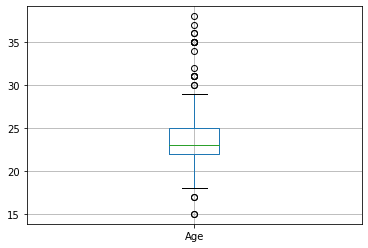

In [8]:
dataframe.boxplot(column='Age')

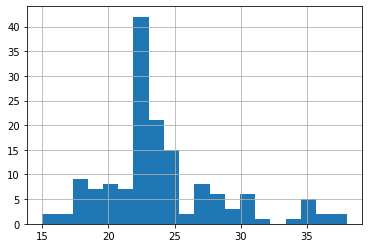

In [9]:
dataframe['Age'].hist(bins=20)

Since we can see that the Age attribute has many outliers and also the data in it is left skewed let us first normalize the data and create a new column Age_normalized in dataset

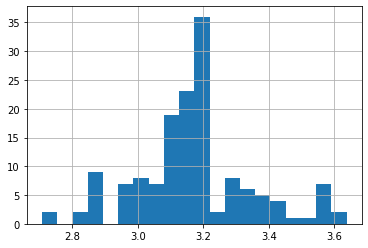

In [10]:
dataframe['Age_normalized'] = np.log(dataframe['Age'])
dataframe['Age_normalized'].hist(bins=20)

Now let us similarly check for credit score

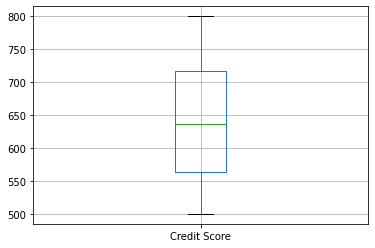

In [11]:
dataframe.boxplot(column="Credit Score")

Since there are not many outliers present in the Credit Score attribute we do not need it to be normalized.

Since we have now adjusted the null values and also normalized the required data in the dataset let us now divide the data into dependent and independent data

In [12]:
dataframe.columns

Index(['Name', 'Nationality', 'Age', 'Program_Type', 'Total_income_P_G_S',
       'Any_Securities', 'Credit Score', 'Secured Admit Card', 'Eligibility',
       'Age_normalized'],
      dtype='object')

In [13]:
X = dataframe.iloc[:, np.r_[1,4:8,9]].values
Y = dataframe.iloc[:, 8].values

In [14]:
X

array([['Indian', 'Stable', 'Yes', 660.0, 'Yes', 3.1354942159291497],
       ['Indian', 'Stable', 'No', 558.0, 'Yes', 3.091042453358316],
       ['Indian', 'Stable', 'No', 525.0, 'Yes', 2.9444389791664403],
       ['Indian', 'Not Stable', 'No', 529.0, 'Yes', 3.5263605246161616],
       ['Indian', 'Stable', 'No', 764.0, 'Yes', 2.995732273553991],
       ['Not Indian', 'Stable', 'Yes', 636.0, 'Yes', 2.8903717578961645],
       ['Indian', 'Not Stable', 'Yes', 639.0, 'Yes', 3.1780538303479458],
       ['Indian', 'Stable', 'No', 653.0, 'No', 3.1780538303479458],
       ['Indian', 'Stable', 'Yes', 655.0, 'Yes', 3.1354942159291497],
       ['Indian', 'Not Stable', 'Yes', 630.0, 'Yes', 3.295836866004329],
       ['Indian', 'Stable', 'No', 630.0, 'No', 3.2188758248682006],
       ['Indian', 'Stable', 'No', 665.0, 'No', 2.9444389791664403],
       ['Indian', 'Stable', 'No', 509.0, 'Yes', 3.332204510175204],
       ['Indian', 'Not Stable', 'Yes', 778.0, 'Yes', 2.8903717578961645],
       ['Indian

In [15]:
Y

array(['Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No',
       'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No',
       'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No',
       'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes',
       'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes',
       'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes',

Now let us further split our data into the training and testing set using sklearn's preprocessing train and test class

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=20)

In [17]:
X_train[0,:]

array(['Indian', 'Not Stable', 'Yes', 739.0, 'Yes', 2.9444389791664403],
      dtype=object)

Since we see that there are many attributes with categorical data present in it we need to convert that categorical data into numeric data as our machine only understands categorical data

In [18]:
label_encoder_x = LabelEncoder()

In [19]:
for i in range(0,3):
  X_train[:,i] = label_encoder_x.fit_transform(X_train[:,i])
X_train[:,4] = label_encoder_x.fit_transform(X_train[:,4])

In [20]:
X_train[0,:]

array([0, 0, 1, 739.0, 1, 2.9444389791664403], dtype=object)

Similarly for X_test

In [21]:
X_test[0,:]

array(['Indian', 'Not Stable', 'Yes', 698.0, 'Yes', 3.044522437723423],
      dtype=object)

In [22]:
for i in range(0,3):
  X_test[:,i] = label_encoder_x.fit_transform(X_test[:,i])
X_test[:,4] = label_encoder_x.fit_transform(X_test[:,4])

In [23]:
X_test[0,:]

array([0, 0, 1, 698.0, 1, 3.044522437723423], dtype=object)

Similarly let us encode all the values for Y_train and Y_test

In [24]:
Y_train[0:5]

array(['Yes', 'Yes', 'Yes', 'No', 'No'], dtype=object)

In [25]:
label_encoder_y = LabelEncoder()

In [26]:
Y_train = label_encoder_y.fit_transform(Y_train)

In [27]:
Y_train[0:5]

array([1, 1, 1, 0, 0])

In [28]:
Y_test[0:5]

array(['Yes', 'No', 'No', 'Yes', 'Yes'], dtype=object)

In [29]:
Y_test = label_encoder_y.fit_transform(Y_test)


In [30]:
Y_test[0:5]

array([1, 0, 0, 1, 1])

Since now we have also encoded our train and test sets let us sandard scale our train and test sets using Standard Scaler

In [31]:
ss = StandardScaler()

In [32]:
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

Finally we can use our algorithm Random Forest classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier
RFclassifier = RandomForestClassifier(n_estimators=100, random_state=0)

In [64]:
RFclassifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

In [65]:
Y_pred = RFclassifier.predict(X_test)

In [66]:
Y_pred

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1])

In [67]:
Y_test

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1])

In [68]:
print("The accuracy of our model using Random Forest Algorithm is : ", metrics.accuracy_score(Y_pred,Y_test))

The accuracy of our model using Random Forest Algorithm is :  0.9
